# Exploratory Data Analysis Starter

## Import packages

In [35]:
import pandas as pd
import janitor  # For data cleaning
import dabl   # For quick, automated EDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
sns.set_theme(style="whitegrid")

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.


Use Kaggle's dataset API to load the data directly to your local environment

```
    import opendatasets as od

    client_url = 'https://www.kaggle.com/datasets/lucasgarces/bcgx-powerco-client' # Kaggle dataset URL
    prices_url = 'https://www.kaggle.com/datasets/lucasgarces/bcgx-powerco-prices' # Kaggle dataset URL
    od.download(client_url)
    od.download(prices_url)
```

In [57]:
client_df = pd.read_csv('../Data/client_data.csv')
price_df = pd.read_csv('../Data/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [58]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [59]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [13]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [15]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [16]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

In [47]:
print("\n--- Starting Task 1: Data Cleaning & Preparation ---")

# --- 1.1 Initial Cleaning ---
# Use pyjanitor to clean column names (e.g., lowercase, remove special chars)
client_df_clean = client_df.clean_names()
price_df_clean = price_df.clean_names()

print("Column names cleaned.")


--- Starting Task 1: Data Cleaning & Preparation ---
Column names cleaned.


In [48]:
# --- 1.2 Handle Data Types ---
# Convert all date columns to datetime objects
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    client_df_clean[col] = pd.to_datetime(client_df_clean[col])

price_df_clean['price_date'] = pd.to_datetime(price_df_clean['price_date'])
print("Date columns converted to datetime.")

# --- 1.3 Handle Missing Values ---
print("\nMissing values before handling:")
print(client_df_clean.isnull().sum().sort_values(ascending=False).head())

Date columns converted to datetime.

Missing values before handling:
id                 0
channel_sales      0
cons_12m           0
cons_gas_12m       0
cons_last_month    0
dtype: int64


In [49]:
# For this EDA, we'll keep it simple. We can fill categorical NaNs with 'Unknown'
# or drop them if they are few. Let's fill.
for col in ['channel_sales', 'origin_up']:
    client_df_clean[col] = client_df_clean[col].replace('MISSING', np.nan)
    client_df_clean[col] = client_df_clean[col].fillna('Unknown')

print("\nMissing values handled.")


Missing values handled.


In [50]:
# --- 1.4 Merge Datasets ---
# To avoid a massive dataframe, let's aggregate price data first.
# We'll calculate average and standard deviation of prices for each customer.
price_agg = price_df_clean.groupby('id').agg(
    avg_price_off_peak_var=('price_off_peak_var', 'mean'),
    std_price_off_peak_var=('price_off_peak_var', 'std'),
    avg_price_peak_var=('price_peak_var', 'mean'),
    std_price_peak_var=('price_peak_var', 'std'),
    avg_price_mid_peak_var=('price_mid_peak_var', 'mean'),
    std_price_mid_peak_var=('price_mid_peak_var', 'std')
).reset_index()

# Merge the aggregated price data with the client data
df_merged = pd.merge(client_df_clean, price_agg, on='id', how='left')

print(f"\nDatasets merged. Final shape: {df_merged.shape}")
print("Task 1 complete.")


Datasets merged. Final shape: (14606, 32)
Task 1 complete.


In [51]:
display(df_merged)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,avg_price_off_peak_var,std_price_off_peak_var,avg_price_peak_var,std_price_peak_var,avg_price_mid_peak_var,std_price_mid_peak_var
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.007829,0.100749,0.005126,0.066530,0.020983
1,d29c2c54acc38ff3c0614d0a653813dd,Unknown,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.002212,0.007124,0.024677,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.002396,0.088421,0.000506,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.002317,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,Unknown,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.003847,0.103638,0.001885,0.072865,0.001588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0.144124,0.003897,0.000000,0.000000,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0.106799,0.003669,0.095406,0.001863,0.070817,0.000128
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0.124338,0.003976,0.103794,0.001989,0.073160,0.001368
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0.149609,0.002212,0.007124,0.024677,0.000000,0.000000



--- Starting Task 2: Exploratory Data Analysis ---

Running Dabl for automated EDA...
Target looks like classification
Showing only top 10 of 22 continuous features


c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

Linear Discriminant Analysis training set score: 0.505


c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\plot\utils.py:615: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\plot\utils.py:294: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\dabl\plot\utils.py:294: DeprecationWarning: is_categorical_dtype is deprecated and will be remove

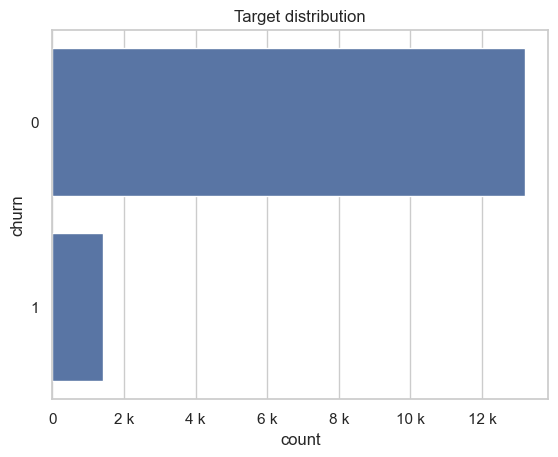

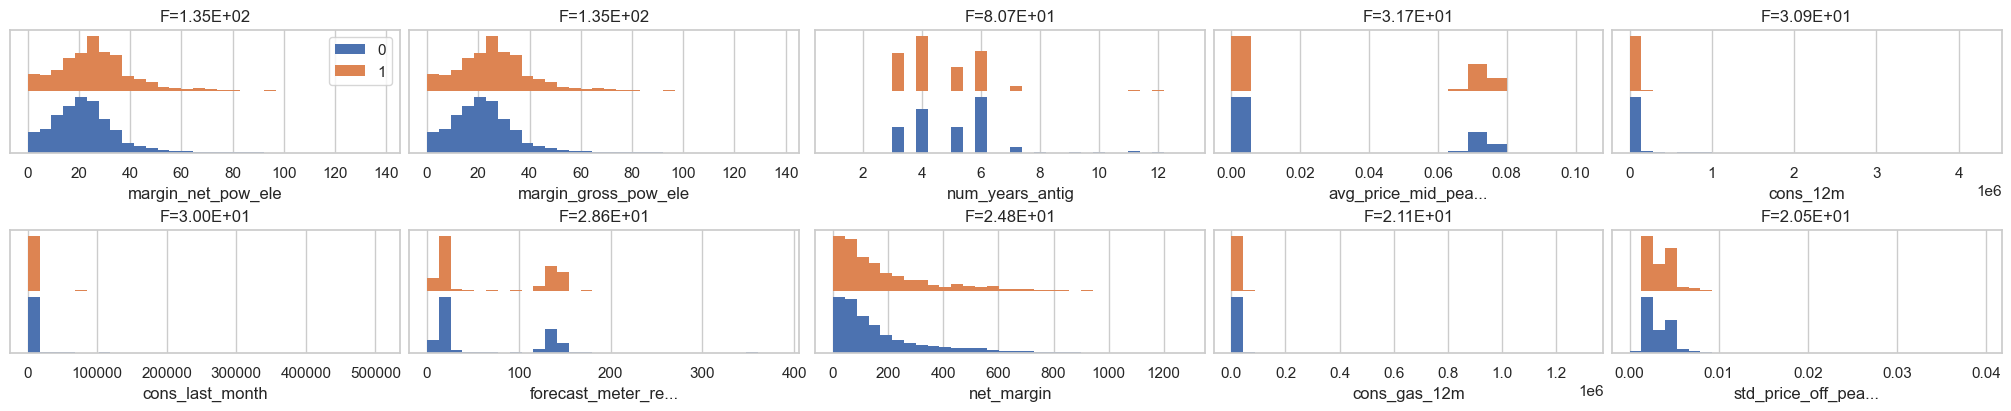

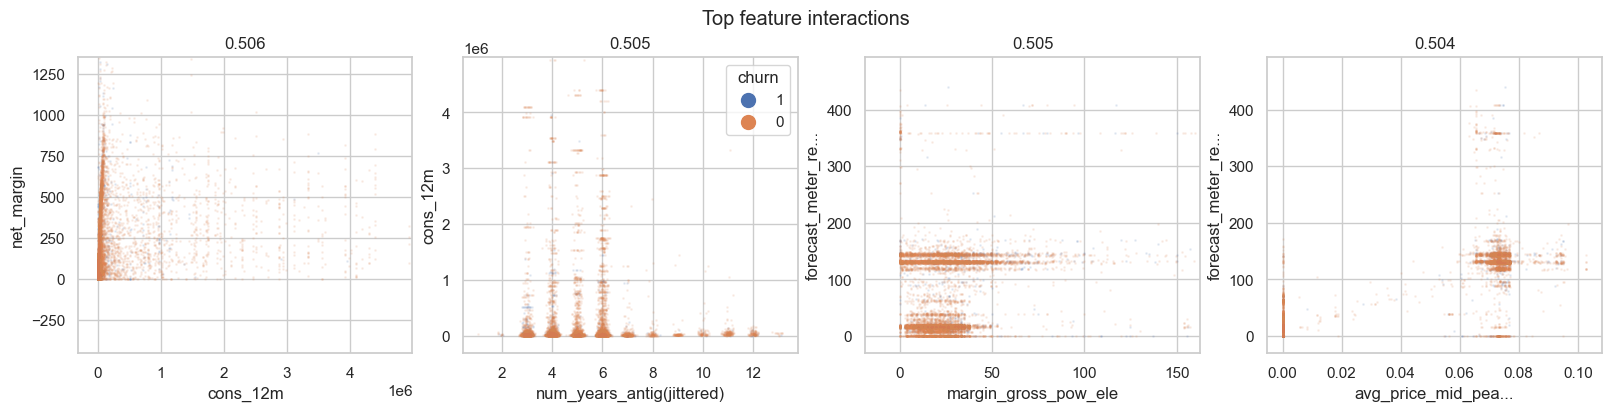

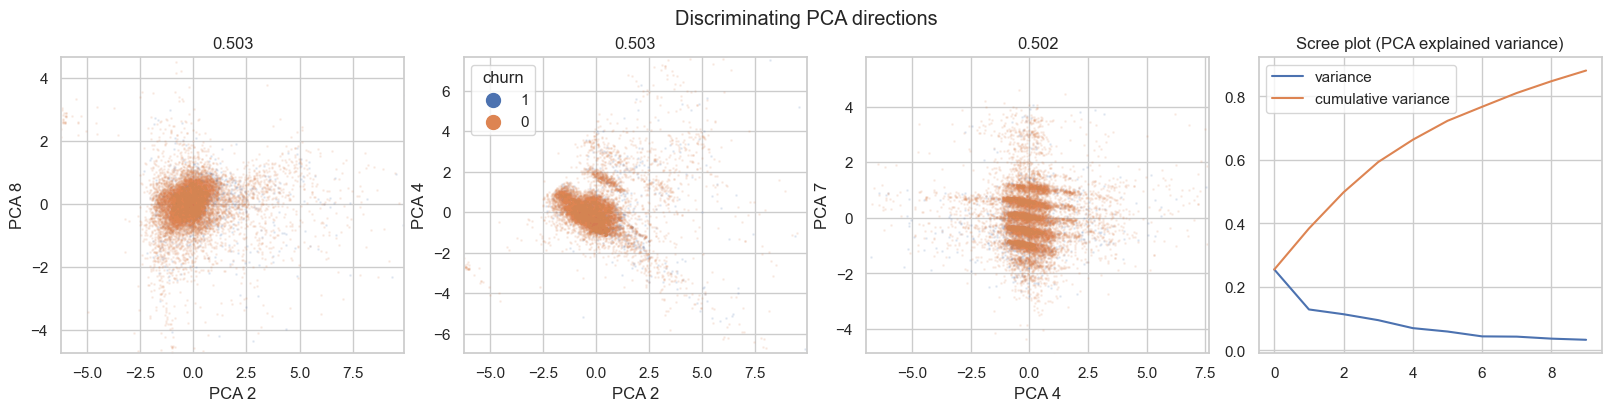

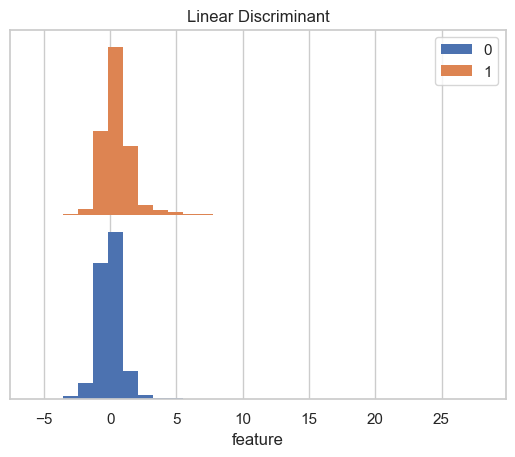

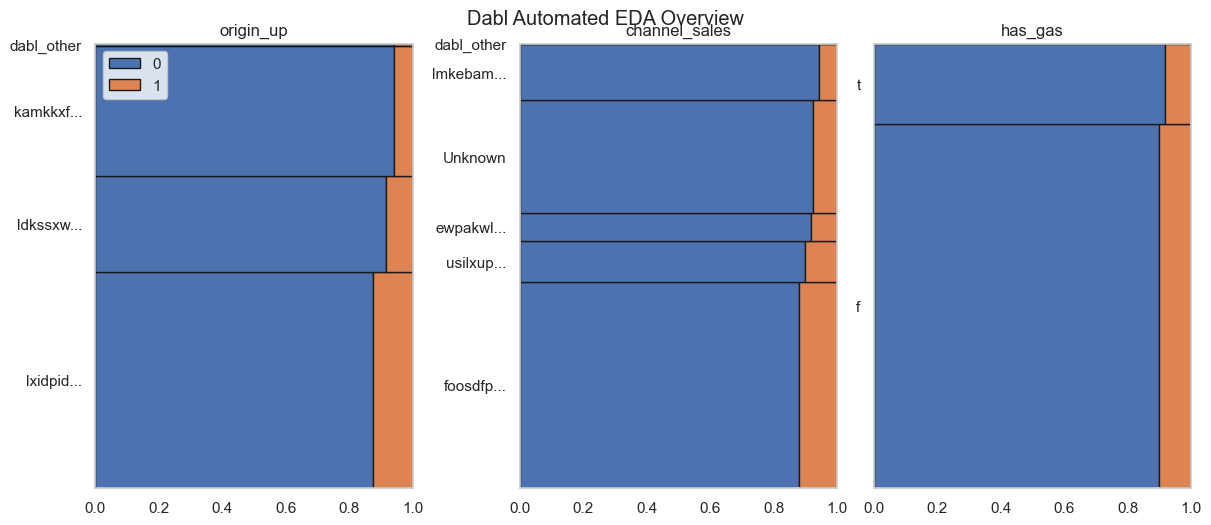

Dabl plot generated. It provides a quick look at feature types, distributions, and relationship with the target.


In [52]:
# =============================================================================
# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
print("\n--- Starting Task 2: Exploratory Data Analysis ---")

# --- 2.1 Quick Automated EDA with Dabl ---
# Dabl provides a high-level overview of the data and relationships.
print("\nRunning Dabl for automated EDA...")
dabl.plot(df_merged, target_col='churn')
plt.suptitle("Dabl Automated EDA Overview", y=1.02)
plt.show()
print("Dabl plot generated. It provides a quick look at feature types, distributions, and relationship with the target.")



Overall Churn Rate:
churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64


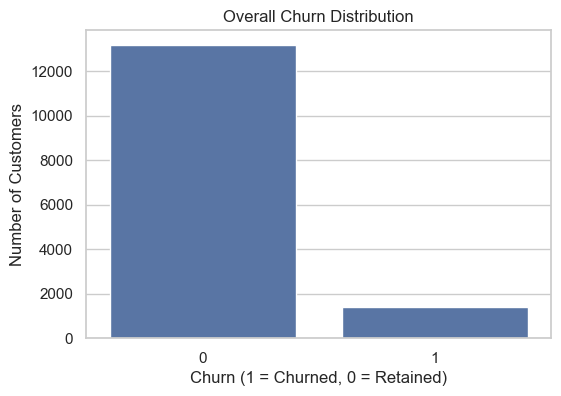

In [53]:
# --- 2.2 Overall Churn Rate ---
churn_rate = df_merged['churn'].value_counts(normalize=True) * 100
print(f"\nOverall Churn Rate:\n{churn_rate}")

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_merged)
plt.title('Overall Churn Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Churn (1 = Churned, 0 = Retained)')
plt.show()


In [54]:
# # --- 2.3 Churn by Customer Segments ---
# # Churn by Business Activity
# plt.figure(figsize=(12, 6))
# sns.countplot(x='activity_new', hue='churn', data=df_merged)
# plt.title('Churn by Business Activity')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# # Churn by Sales Channel
# plt.figure(figsize=(12, 6))
# sns.countplot(x='channel_sales', hue='churn', data=df_merged)
# plt.title('Churn by Sales Channel')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

c:\Users\garce\AppData\Local\pypoetry\Cache\virtualenvs\applied-data-science-lucasgarces-yp1JliVu-py3.13\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\garce\AppData\Local\Temp\ipykernel_24320\1429929439.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_merged, x=feature, hue='churn', fill=True, common_norm=False, log_scale=True)


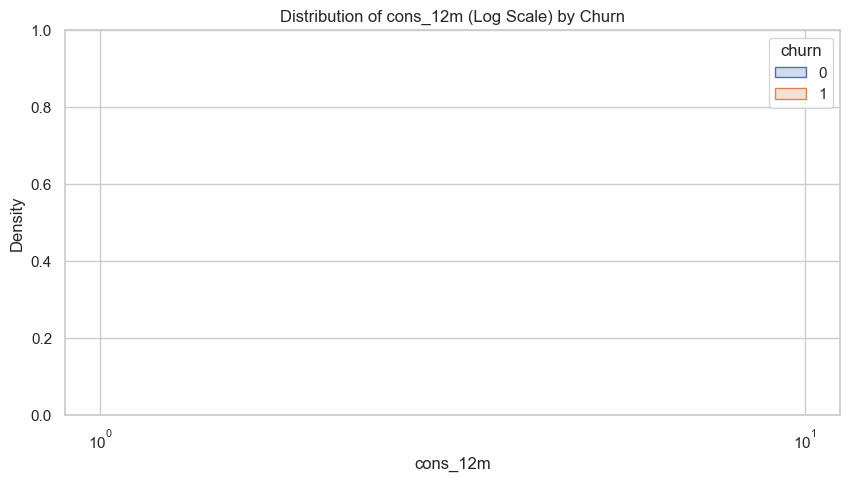

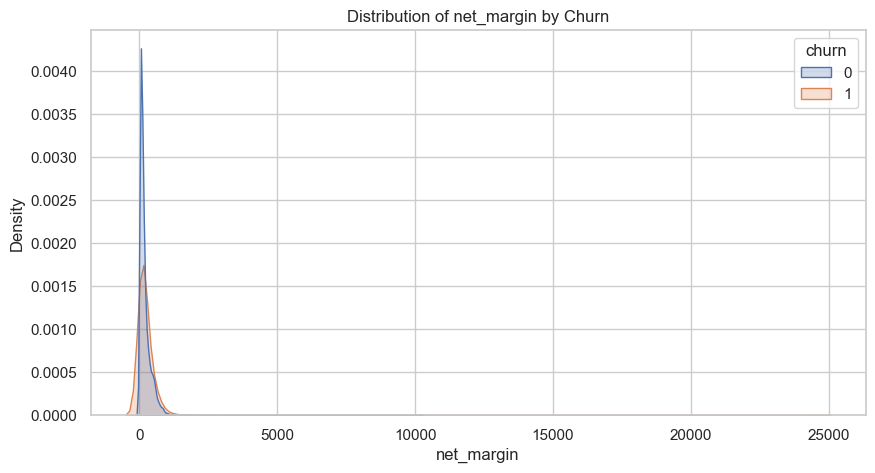

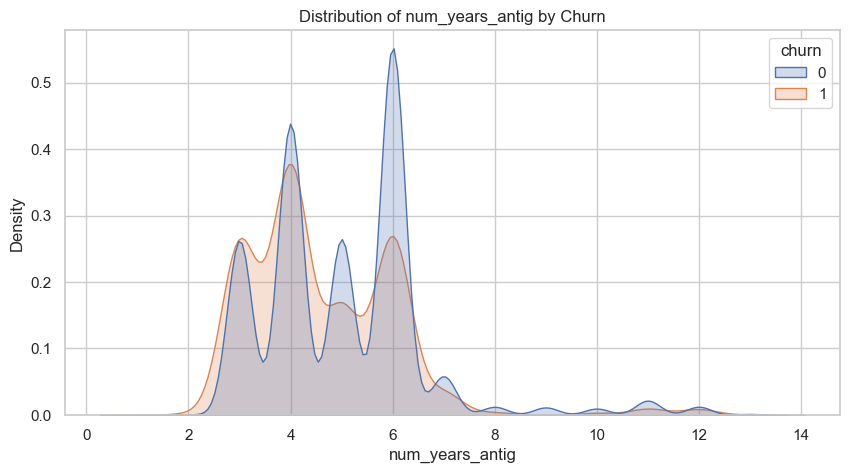

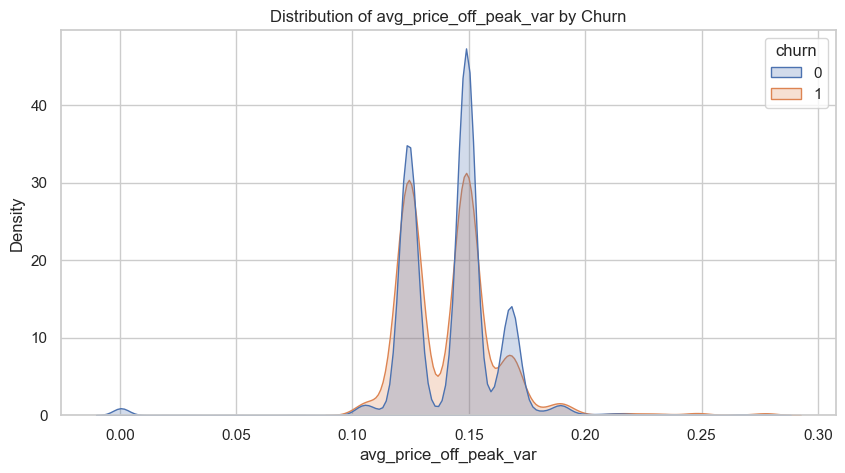

In [55]:
# --- 2.4 Distributions of Key Numerical Features ---
key_numeric_features = ['cons_12m', 'net_margin', 'num_years_antig', 'avg_price_off_peak_var']

for feature in key_numeric_features:
    plt.figure(figsize=(10, 5))
    # Using log scale for consumption as it's often highly skewed
    if 'cons' in feature:
        sns.kdeplot(data=df_merged, x=feature, hue='churn', fill=True, common_norm=False, log_scale=True)
        plt.title(f'Distribution of {feature} (Log Scale) by Churn')
    else:
        sns.kdeplot(data=df_merged, x=feature, hue='churn', fill=True, common_norm=False)
        plt.title(f'Distribution of {feature} by Churn')
    plt.show()


In [56]:
# --- 2.5 Summary of Initial Findings (Documentation) ---
print("\n--- Initial EDA Findings ---")
print("1. **Churn Rate:** The overall churn rate is approximately {:.1f}%, indicating a significant but not majority churn.".format(churn_rate.get(1, 0)))
print("2. **Automated EDA (Dabl):** The dabl plot gives a quick confirmation that many numerical features (like consumption, margins) and categorical features are potentially predictive of churn.")
print("3. **Segmentation:** There appear to be differences in churn rates across different business activities and sales channels, which will be important for targeted retention strategies.")
print("4. **Consumption:** The distribution plots (on a log scale) show that customers who churn might have slightly different consumption patterns than those who stay. This needs further investigation.")
print("5. **Pricing:** The average off-peak variable price distribution shows some overlap but also potential differences between churned and non-churned customers. This supports the hypothesis that price is a factor.")
print("6. **Antiquity:** The `num_years_antig` (customer tenure) plot suggests that customer loyalty over time might play a role in the decision to churn.")

print("\nTask 2 complete.")


--- Initial EDA Findings ---
1. **Churn Rate:** The overall churn rate is approximately 9.7%, indicating a significant but not majority churn.
2. **Automated EDA (Dabl):** The dabl plot gives a quick confirmation that many numerical features (like consumption, margins) and categorical features are potentially predictive of churn.
3. **Segmentation:** There appear to be differences in churn rates across different business activities and sales channels, which will be important for targeted retention strategies.
4. **Consumption:** The distribution plots (on a log scale) show that customers who churn might have slightly different consumption patterns than those who stay. This needs further investigation.
5. **Pricing:** The average off-peak variable price distribution shows some overlap but also potential differences between churned and non-churned customers. This supports the hypothesis that price is a factor.
6. **Antiquity:** The `num_years_antig` (customer tenure) plot suggests that 